В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых



In [1]:
import numpy as np
import pandas as pd

from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter


# Exploratory Data Analysis (EDA)



In [2]:
from google.colab import files
files.upload()

Saving news_fake-n-true.csv to news_fake-n-true.csv


In [3]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


In [4]:
data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)
display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

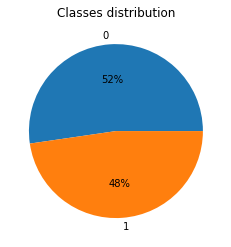

In [ ]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?

## Векторизация текста


In [5]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')#какая разница между этим способом и tf-idf vec?

In [6]:
X = f.fit_transform(data_clean["text"])

display(X.shape)

(44898, 121690)

## Разделение на выборки

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data_clean['label'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)

(35918, 121690) (8980, 121690)


## Naive Bayes

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11) # evenly spaced values within a given interval

score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    score_test[count]= bayes.score(X_test, y_test)
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

In [ ]:
best_index = models['Test Precision'].idxmax()

display(best_index)

display(models.iloc[best_index])

0

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

In [ ]:
best_index = models[models['Test Precision']>0.96]['Test Accuracy'].idxmax()

bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])

bayes.fit(X_train, y_train)

models.iloc[best_index, :]

alpha             0.000010
Train Accuracy    0.978534
Test Accuracy     0.960690
Test Recall       0.947677
Test Precision    0.968817
Name: 0, dtype: float64

## Support Vector Machines (SVM, метод опорных векторов)

In [ ]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 # эта ячейка очень долго грузится, но так и не срабатывает :(. В теории код такой

In [ ]:
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

In [ ]:
best_index = models[models['Test Precision']>0.99]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

## Decisions Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

#X = vectorizer.fit_transform(data_clean['text'])

In [13]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
tree_y_pred = tree_clf.predict(X_test)

In [15]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4718
           1       1.00      1.00      1.00      4262

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## Random forest

In [16]:
forest = RandomForestClassifier(n_estimators=500, verbose=1)

In [17]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [18]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.2s finished


In [19]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4718
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [21]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=10, verbose=1)

In [22]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1982           45.76m
         2           1.0459           44.22m
         3           0.9191           43.67m
         4           0.8120           43.54m
         5           0.7206           43.26m
         6           0.6419           43.18m
         7           0.5738           43.12m
         8           0.5145           43.15m
         9           0.4622           43.07m
        10           0.4167           43.04m
        20           0.1666           42.45m
        30           0.0856           41.87m
        40           0.0556           41.30m
        50           0.0434           40.41m
        60           0.0394           39.60m
        70           0.0332           38.89m
        80           0.0305           38.24m
        90           0.0288           37.65m
       100           0.0273           37.12m
       200           0.0181           32.50m
       300           0.0128           28.25m
       40

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [ ]:
#gb_clf_es = GradientBoostingClassifier(n_iter_no_change=20, verbose=10)

#es_y_pred = gb_clf_es.predict(X_test)

In [24]:
gb_y_pred = gb_clf.predict(X_test)

In [26]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4718
           1       0.99      1.00      1.00      4262

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

